In [36]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
from torchsummary import summary
plt.ion()  
%matplotlib inline

In [37]:
model = torch.load("modelf.pth")

In [31]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
     
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        
    ]),
}

data_dir = 'Data1'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=8)
              for x in ['train', 'val','test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val','test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [32]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    transform = data_transforms['val']

    test_image = Image.open(test_image_name).convert('RGB')
    test_image_tensor = transform(test_image)
    plt.imshow(test_image)
    
    

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1,3, 224, 224)
   
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
         # Reverse the log function in our output
        output = torch.exp(out)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    if classes.item()==0 :
        a="Covid"
    elif classes.item()==1 :
        a="Normal"
    else:
        a="Pneumonia"
     
    return probs.item(),a

(0.9388213157653809, 'Covid')

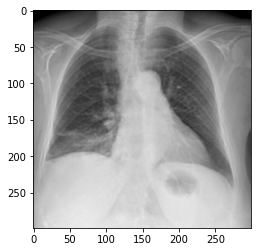

In [33]:
predict(model,'C1.png')


(0.7159021496772766, 'Pneumonia')

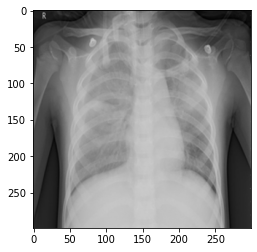

In [34]:
predict(model,'P2.png')

(0.9280726909637451, 'Normal')

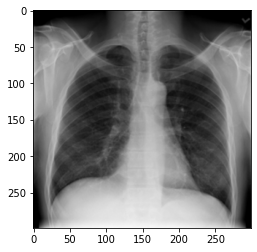

In [35]:
predict(model,'N1.png')